In [58]:
from keras.datasets import mnist
from matplotlib import pyplot as plt

plt.style.use('dark_background')

import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.utils import normalize, to_categorical

#Please use TF2 as Dense Model is available in that only
#Change Lirary from keras.models and keras.layers to tennsorflow.keras.layers

In [98]:
print(tensorflow.version)

<module 'tensorflow_core._api.v2.version' from '/opt/anaconda3/envs/notebook/lib/python3.7/site-packages/tensorflow_core/_api/v2/version/__init__.py'>


#Use Keras to load data into program. Data is already split into training and testing sets

In [99]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [100]:
X_train.shape

(60000, 28, 28)

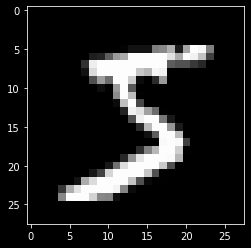

In [101]:
plt.imshow(X_train[0], cmap='gray')

In [102]:
tensorflow.compat.v1.get_default_graph

<function tensorflow.python.framework.ops.get_default_graph()>

Normalize pixels features so they range from 0 to 1. 

The "to_catagorical" function is used to declare that no priority is assigned by virtue of value. That is, it will not assign a higher priority to 9 than to 2. It works by transforming each target label into an array of 1s and 0s where the index of number 1 indicates the digit the image represents. 

In [103]:
X_train = normalize(X_train, axis = 1)
X_test = normalize(X_test, axis = 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Before feeding a 2 dimensional matrix into a neural network, we use a flatten layer which transforms it into a 1 dimensional array by appending each subsequent row to the one that preceded it. We’re going to be using two hidden layers consisting of 128 neurons each and an output layer consisting of 10 neurons, each for one of the 10 possible digits. The softmax activation function will return the probability that a sample represents a given digit.

In [104]:
model = Sequential()

In [105]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Catagerocial crossentropy as a loss function is useful to predict classes and then measure performance using accuracy

In [106]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

We set 10% of the data for validation (testing) and use it to compare the tendancy of a model to overfit with and without dropout. A batch size of 32 implies that we will compute the gradient and take a step in the direction of the gradient with a magnitude equal to the learning rate, after having pass 32 samples through the neural network. We do this a total of 10 times as specified by the number of epochs.

In [107]:
#The fit() function is used to learn about the training and validation accuracies at each epoch by using the history variable.

history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.1,
    verbose = 1,
    shuffle = True
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 45us/sample - loss: 0.3373 - accuracy: 0.9054 - val_loss: 0.1634 - val_accuracy: 0.9532
Epoch 2/10
54000/54000 [==============================] - 2s 37us/sample - loss: 0.1570 - accuracy: 0.9539 - val_loss: 0.1163 - val_accuracy: 0.9663
Epoch 3/10
54000/54000 [==============================] - 2s 37us/sample - loss: 0.1063 - accuracy: 0.9690 - val_loss: 0.0999 - val_accuracy: 0.9715
Epoch 4/10
54000/54000 [==============================] - 2s 38us/sample - loss: 0.0796 - accuracy: 0.9768 - val_loss: 0.0884 - val_accuracy: 0.9720
Epoch 5/10
54000/54000 [==============================] - 2s 39us/sample - loss: 0.0615 - accuracy: 0.9819 - val_loss: 0.0890 - val_accuracy: 0.9730
Epoch 6/10
54000/54000 [==============================] - 2s 39us/sample - loss: 0.0495 - accuracy: 0.9853 - val_loss: 0.0843 - val_accuracy: 0.9745
Epoch 7/10
54000/54000 [==============================] -

History from fit( ) has the following attributes .

In [108]:
for key in history.history.keys():
    print (key)

loss
accuracy
val_loss
val_accuracy


In [109]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

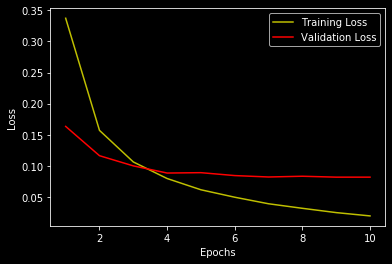

In [110]:
plt.plot(epochs, loss, 'y', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

In [111]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

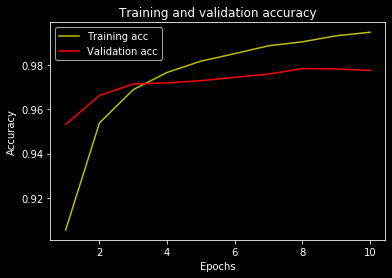

In [112]:
plt.plot(epochs, accuracy, 'y', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [113]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy : ", test_acc)
print("Test loss : ", test_loss)

10000/10000 [==============================] - 0s 19us/sample - loss: 0.0866 - accuracy: 0.9742
Test accuracy :  0.9742
Test loss :  0.08659558380602393


Dropout

There’s some debate as to whether the dropout should be placed before or after the activation function. As a rule of thumb, place the dropout after the activate function for all activation functions other than relu. In passing 0.5, every hidden unit (neuron) is set to 0 with a probability of 0.5. In other words, there’s a 50% change that the output of a given neuron will be forced to 0.

In [114]:
model_dropout = Sequential()

model_dropout.add(Flatten(input_shape = (28,28)))

model_dropout.add(Dense(128))
model.add(Dropout(0.5))
model_dropout.add(Activation('relu'))

model_dropout.add(Dense(128))
model.add(Dropout(0.5))
model_dropout.add(Activation('relu'))

model_dropout.add(Dense(10))
model_dropout.add(Activation('softmax'))

model_dropout.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_9 (Activation)    (None, 10)               

Again, since we’re trying to predict classes, we use categorical crossentropy as our loss function.

In [115]:
model_dropout.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

If the premise behind dropout holds, then we should see a notable difference in the validation accuracy compared to the previous model. The shuffle parameter will shuffle the training data before each epoch.

In [116]:
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.1,
    verbose = 1,
    shuffle = True,
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 53us/sample - loss: 0.2849 - accuracy: 0.9176 - val_loss: 0.1454 - val_accuracy: 0.9595
Epoch 2/10
54000/54000 [==============================] - 2s 45us/sample - loss: 0.1185 - accuracy: 0.9634 - val_loss: 0.1001 - val_accuracy: 0.9687
Epoch 3/10
54000/54000 [==============================] - 3s 47us/sample - loss: 0.0816 - accuracy: 0.9745 - val_loss: 0.0797 - val_accuracy: 0.9760
Epoch 4/10
54000/54000 [==============================] - 2s 46us/sample - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0786 - val_accuracy: 0.9770
Epoch 5/10
54000/54000 [==============================] - 2s 46us/sample - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.0840 - val_accuracy: 0.9780
Epoch 6/10
54000/54000 [==============================] - 2s 46us/sample - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0873 - val_accuracy: 0.9757
Epoch 7/10
54000/54000 [==============================] -

Significantly lower validation loss.

In [117]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)

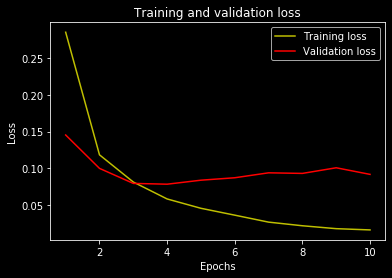

In [118]:
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

In [119]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']

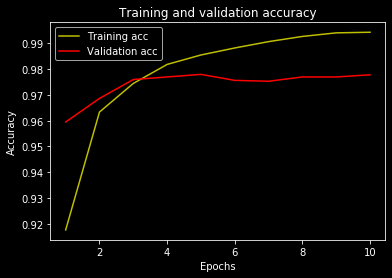

In [120]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

The accuracy obtained on the testing set isn’t very different than the one obtained from the model without dropout. This is in all likelihood due to the limited number of samples.

In [121]:
test_loss, test_acc = model_dropout.evaluate(X_test, y_test)
print("Test Accuracy : ", test_acc)
print("Test Loss : ", test_loss)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.1079 - accuracy: 0.9754
Test Accuracy :  0.9754
Test Loss :  0.10792203838179848


Dropout can help a model generalize by randomly setting the output for a given neuron to 0. In setting the output to 0, the cost function becomes more sensitive to neighbouring neurons changing the way the weights will be updated during the process of backpropagation.